In [1]:
import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

/Users/r3dmaohong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


Platform: Darwin-16.6.0-x86_64-i386-64bit
Tensorflow version: 1.4.1
Keras version: 2.1.2


In [2]:
import os, shutil

ROOT_DIR = os.getcwd()
ROOT_DIR = os.path.join(ROOT_DIR, "data", "dogs-vs-cats")
DATA_PATH = os.path.join(ROOT_DIR, "data")

original_dataset_dir = os.path.join(DATA_PATH, "train")

base_dir = os.path.join(DATA_PATH, "cats_and_dogs_small")
if not os.path.exists(base_dir): 
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): 
    os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir): 
    os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)    

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy first 1000 cat images to train_cats_dir complete!')

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 cat images to validation_cats_dir complete!')

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 cat images to test_cats_dir complete!')

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy first 1000 dog images to train_dogs_dir complete!')

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 dog images to validation_dogs_dir complete!')

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)
    
print('Copy next 500 dog images to test_dogs_dir complete!')

Copy first 1000 cat images to train_cats_dir complete!
Copy next 500 cat images to validation_cats_dir complete!
Copy next 500 cat images to test_cats_dir complete!
Copy first 1000 dog images to train_dogs_dir complete!
Copy next 500 dog images to validation_dogs_dir complete!
Copy next 500 dog images to test_dogs_dir complete!


In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
# feature extraction

In [4]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False, # only use the basic layer for feature extraction
                  input_shape=(150, 150, 3)) # shape and channel

58892288/58889256 [==============================] - 43s 1us/step


In [5]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [ ]:
#method 1: basic layer: feature extraction + new densely-connected layer: retraining

In [8]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) # output size of vgg16
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch) #feature extraction?
        features[(i * batch_size) : ((i + 1) * batch_size)] = features_batch 
        labels[(i * batch_size) : ((i + 1) * batch_size)] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    
    print('extract_features complete!')
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
extract_features complete!
Found 1000 images belonging to 2 classes.
extract_features complete!
Found 1000 images belonging to 2 classes.
extract_features complete!


In [9]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [10]:
# new densely-connected layer
from keras import models
from keras import layers
from keras import optimizers

# new densely-connected layer
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5)) # prevent overfitting
model.add(layers.Dense(1, activation='sigmoid')) # only has 2 kinds of output

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

# the input is the `extract_features()` output
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 7s 3ms/step - loss: 0.5779 - acc: 0.6770 - val_loss: 0.4434 - val_acc: 0.8180
Epoch 2/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.4213 - acc: 0.8025 - val_loss: 0.3586 - val_acc: 0.8630
Epoch 3/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.3468 - acc: 0.8595 - val_loss: 0.3237 - val_acc: 0.8730
Epoch 4/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.3067 - acc: 0.8800 - val_loss: 0.2983 - val_acc: 0.8920
Epoch 5/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.2780 - acc: 0.8915 - val_loss: 0.2792 - val_acc: 0.8950
Epoch 6/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.2646 - acc: 0.8940 - val_loss: 0.2742 - val_acc: 0.8930
Epoch 7/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.2447 - acc: 0.9085 - val_loss: 0.2612 - val_acc: 0.9000
Epoch 8/30
200

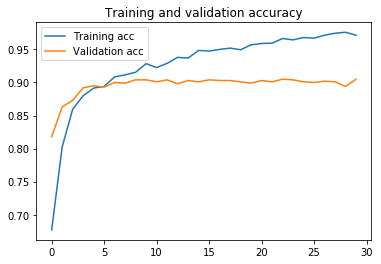

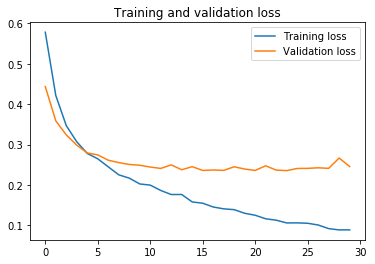

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
# method 2:
# fozen
# fine-tuning
# http://nbviewer.jupyter.org/github/erhwenkuo/deep-learning-with-keras-notebooks/blob/master/1.5-use-pretrained-model-2.ipynb

In [13]:
# expensive
# processing with gpu will be better